In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.3,
    zoom_range=0.0,
    preprocessing_function=preprocess_input,
)

In [35]:
DATAPATH = '/kaggle/input/weather-dataset/dataset'

In [36]:
IMGSIZE = 224
batchSize = 32
seedVal = 32

In [37]:
train_ds = datagen.flow_from_directory(
    DATAPATH,
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=batchSize,
    class_mode='categorical',
    seed = seedVal,
    subset='training')

val_ds = datagen.flow_from_directory(
    DATAPATH,
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=batchSize,
    class_mode='categorical',
    seed = seedVal,
    subset='validation')

Found 4808 images belonging to 11 classes.
Found 2054 images belonging to 11 classes.


In [38]:
print(train_ds.class_indices)

{'dew': 0, 'fogsmog': 1, 'frost': 2, 'glaze': 3, 'hail': 4, 'lightning': 5, 'rain': 6, 'rainbow': 7, 'rime': 8, 'sandstorm': 9, 'snow': 10}


In [39]:
from tensorflow.keras.applications.vgg19 import VGG19

vggModel= VGG19(weights='imagenet', 
                  include_top= False, 
                  input_shape= (IMGSIZE, IMGSIZE, 3))
vggModel.trainable = False

inputs = keras.Input(shape=(IMGSIZE, IMGSIZE, 3))
base = vggModel(inputs, training= False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
inner = keras.layers.Dense(250, activation= 'relu')(vectors) # layer with 250 neurons
inner2 = keras.layers.Dense(128, activation='relu')(inner) # layer with 128 neurons
outputs = keras.layers.Dense(11, activation='softmax')(inner2) # last layer predicting 11 classses
model = keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [40]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 250)               128250    
                                                                 
 dense_7 (Dense)             (None, 128)               32128     
                                                                 
 dense_8 (Dense)             (None, 11)                1419      
                                                           

In [41]:
result = model.fit(train_ds, epochs=50, validation_data = val_ds, callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

Epoch 1/50
151/151 [==============================] - 53s 344ms/step - loss: 0.8529 - accuracy: 0.7394 - val_loss: 0.5182 - val_accuracy: 0.8315
Epoch 2/50
151/151 [==============================] - 53s 348ms/step - loss: 0.3421 - accuracy: 0.8846 - val_loss: 0.4733 - val_accuracy: 0.8413
Epoch 3/50
151/151 [==============================] - 52s 344ms/step - loss: 0.2231 - accuracy: 0.9249 - val_loss: 0.4895 - val_accuracy: 0.8593
Epoch 4/50
151/151 [==============================] - 52s 346ms/step - loss: 0.1423 - accuracy: 0.9557 - val_loss: 0.5273 - val_accuracy: 0.8574
Epoch 5/50
151/151 [==============================] - 51s 338ms/step - loss: 0.0838 - accuracy: 0.9757 - val_loss: 0.5447 - val_accuracy: 0.8569


In [42]:
predict = {}
predict['vgg'] = model.evaluate(val_ds)

65/65 [==============================] - 14s 208ms/step - loss: 0.5447 - accuracy: 0.8569


In [43]:
for prediction in predict.items():
    print(f"""{prediction[0]}: {round((prediction[1][1] * 100),2)}%""")

vgg: 85.69%


In [44]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

Declare a dictionary link - which has all the classes as a value and key as a digit

In [45]:
link = { 0: 'dew',
  1: 'fogsmog',
  2: 'frost',
  3 : 'glaze',
  4 :'hail',
  5 : 'lightning',
  6 : 'rain',
  7 : 'rainbow',
  8 : 'rime',
  9 : 'sandstorm',
  10 : 'snow'
}

In [46]:
def predict(url):
    src = tf.keras.utils.get_file(origin= url)
    image = tf.keras.preprocessing.image.load_img(src, target_size=(IMGSIZE,IMGSIZE))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    predictions = model.predict(input_arr)
    image = io.imread(url)
    plt.imshow(image)
    plt.title(link[np.argmax(predictions)])
    plt.show()


1/1 [==============================] - 0s 21ms/step


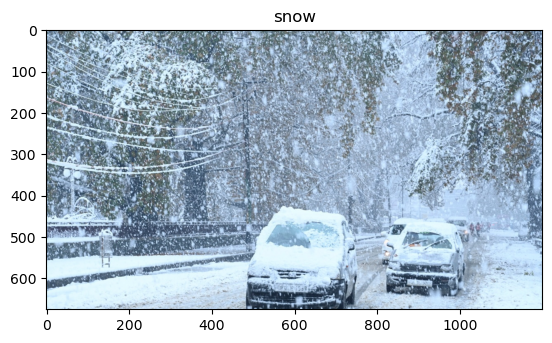

1/1 [==============================] - 0s 21ms/step


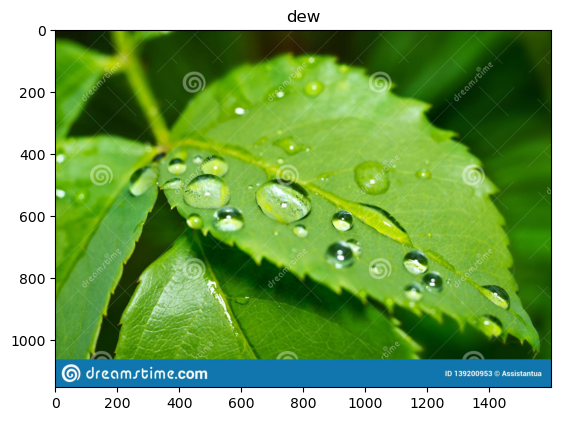

1/1 [==============================] - 0s 21ms/step


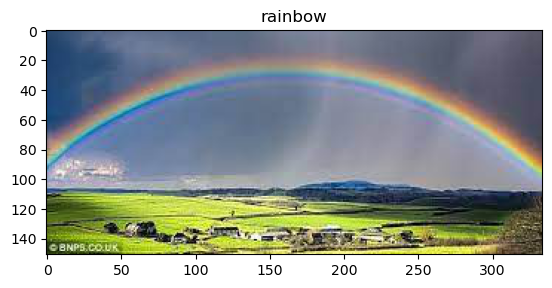

In [50]:
urls = [
    'https://gdb.voanews.com/0b4ced08-e1ae-465e-97ff-96ecfe8f0995_w1200_r1.jpg',
    'https://thumbs.dreamstime.com/z/drops-dew-green-leaves-beautiful-nature-background-morning-fresh-transparent-rain-water-leaf-droplets-outdoors-139200953.jpg',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRvJ8uSdlI0T8SHzxzBx5tEgrfA2Zk5eU6zioK2umDgfMLl2YL-d0HJWBg-1wF6oVZElY&usqp=CAU'
]

for url in urls:
    predict(url)
plt.show()